<a href="https://colab.research.google.com/github/sowndsgood/One_Variable_Calculus/blob/main/Pi_Approximation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Archimedes Approach

In [102]:
import numpy as np

def f(x):
  return np.sqrt(1-x**(2))

x_values=np.linspace(0,1,1000)
y_values=[f(x) for x in x_values]

# Calculate the chord lengths
circumference = 0
for i in range(len(x_values) - 1):
    # Calculate distance between points by Euclidean Distance Formula
    chord_length = np.sqrt((x_values[i] - x_values[i + 1])**2 + (y_values[i] - y_values[i + 1])**2)
    circumference += chord_length

approx_pi = 2 * circumference
print("Approximated pi:", approx_pi)

Approximated pi: 3.1415833423863946


In [99]:
np.sqrt(4)

2.0

# Approximation of Pi using Reimann Sum

In [77]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [78]:
#Function of circle
def f(x):
  return (1-x**2)**(1/2)

In [79]:
def reimann_sum(n): #Right Riemann sum
  delta_x=1/n   #Width of rectangles
  x_values=np.linspace(0,1,n)  #To generate values with same intervals with Linear Space function
  reimann_sum=sum(f(x)*delta_x for x in x_values)  #Formula for Reimann Sum
  return reimann_sum

In [87]:
def reimann_sum_with_triangles(n):
    delta_x = 1/n  # Width of each subinterval
    x_values = np.linspace(0, 1, n+1)  # x values from 0 to 1
    y_values = [f(x) for x in x_values]  # Compute y values

    def triangle_area(base, height):
        """Calculate the area of a triangle given base and height with formula (1/2) * base * height"""
        return 0.5 * base * height

    total_area = 0
    for i in range(n - 1):
        # Rectangle area: height is y[i], width is delta_x
        rect_area = y_values[i] * delta_x
        # Triangle area: base is delta_x, height is the difference in y-values
        height = y_values[i+1] - y_values[i]
        tri_area = triangle_area(delta_x, height)
        # Add both areas for each interval
        total_area += rect_area + tri_area

    return total_area

In [88]:
# Exact value of the integral (area of the semicircle)
actual_value = np.pi / 4

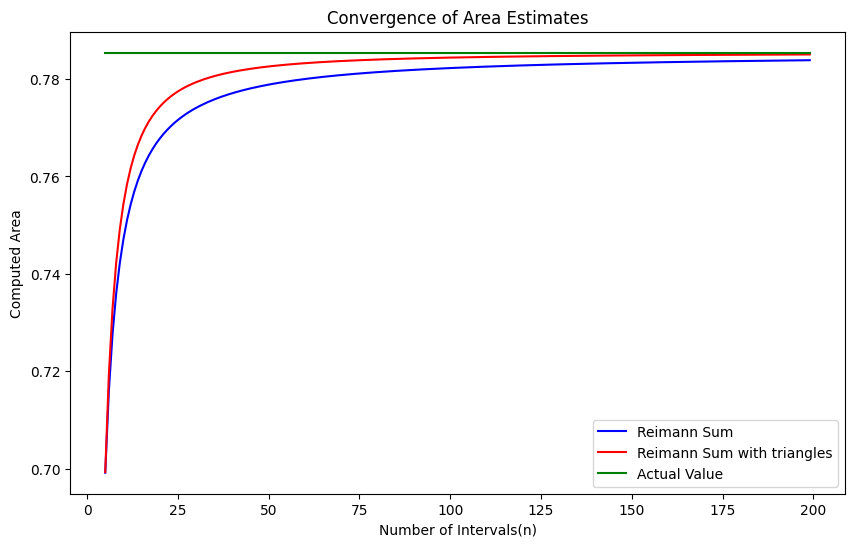

In [95]:
n_values=np.arange(5,200,1)
rs=[reimann_sum(n) for n in n_values]
rts=[reimann_sum_with_triangles(n) for n in n_values]
actual=np.full((np.shape(n_values)),actual_value)

plt.figure(figsize=(10,6))
plt.plot(n_values,rs,color='blue',label='Reimann Sum')
plt.plot(n_values,rts,color='red',label='Reimann Sum with triangles')
plt.plot(n_values,actual,color='green',label='Actual Value')
plt.xlabel('Number of Intervals(n)')
plt.ylabel('Computed Area')
plt.title('Convergence of Area Estimates')
plt.legend()
plt.show()

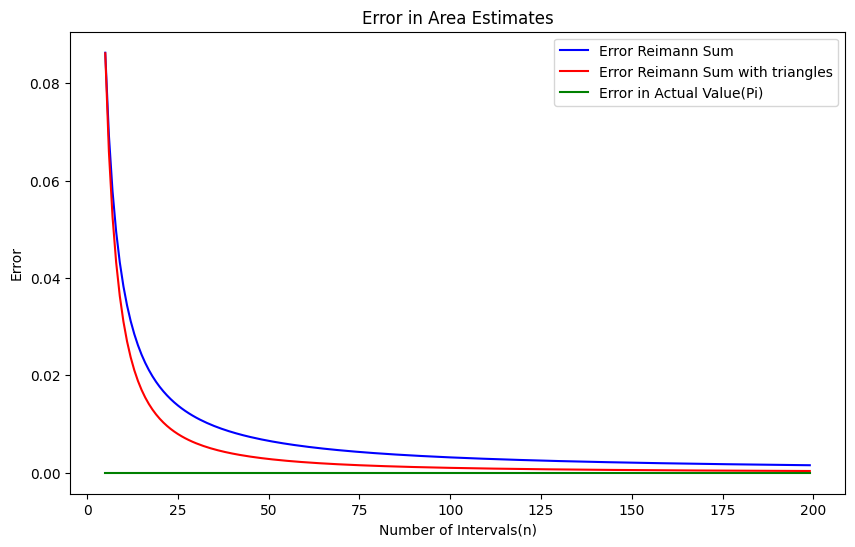

In [96]:
rs_error=[abs(actual_value-rs_value) for rs_value in rs]  #Error in Reimann Sum
rts_error=[abs(actual_value-rts_value) for rts_value in rts]  #Error Reimann Sum with triangles
actual_error=[abs(actual_value-actual) for actual in actual]

plt.figure(figsize=(10,6))
plt.plot(n_values,rs_error,color='blue',label='Error Reimann Sum')
plt.plot(n_values,rts_error,color='red',label='Error Reimann Sum with triangles')
plt.plot(n_values,actual_error,color='green',label='Error in Actual Value(Pi)')
plt.xlabel('Number of Intervals(n)')
plt.ylabel('Error')
plt.title('Error in Area Estimates')
plt.legend()
plt.show()

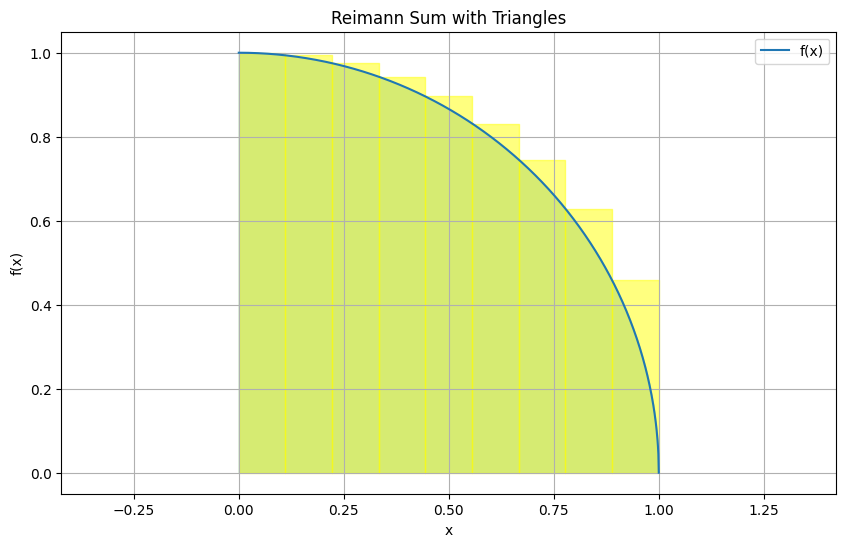

In [97]:
n=1000
a=np.linspace(0,1,n)
b=f(a)
plt.figure(figsize=(10,6))
plt.plot(a,b,label='f(x)')
plt.fill_between(a,0,b,color='lightblue')

rect=10
x=np.linspace(0,1,rect)
y=f(x)
for i in range(rect - 1):
  plt.fill_between([x[i], x[i+1]], [0, 0], [y[i], y[i]], color='yellow', alpha=0.5)


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Reimann Sum with Triangles')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()